# Case Studyb OTT 

In [330]:
import warnings
warnings.filterwarnings("ignore")

In [331]:
# Importing the Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import (metrics,linear_model,model_selection)
from sklearn.model_selection import  cross_val_score

In [332]:
media = pd.read_csv(r'mediacompany.csv',parse_dates=['Date'])

In [333]:
# Print The First 5 Rows
media = media.drop('Unnamed: 7',axis=1)
print(media.head())

        Date  Views_show  Visitors  Views_platform  Ad_impression  \
0 2017-03-01      183738   1260228         1706478     1060860448   
1 2017-03-02      193763   1270561         1690727     1031846645   
2 2017-03-03      210479   1248183         1726157     1010867575   
3 2017-03-04      240061   1492913         1855353     1079194579   
4 2017-03-05      446314   1594712         2041418     1357736987   

   Cricket_match_india  Character_A  
0                    0            0  
1                    0            0  
2                    0            0  
3                    1            0  
4                    0            0  


In [334]:
# Lets Look all the Inofrmation of the Data
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 80 non-null     datetime64[ns]
 1   Views_show           80 non-null     int64         
 2   Visitors             80 non-null     int64         
 3   Views_platform       80 non-null     int64         
 4   Ad_impression        80 non-null     int64         
 5   Cricket_match_india  80 non-null     int64         
 6   Character_A          80 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 4.5 KB


In [335]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [336]:
# Deriving Days Since the Show is Started
from datetime import  datetime
d0 = datetime(2017,2,28)
d1 = media['Date']

delta = d1 -d0
media['Day'] = delta

In [337]:
media.head()


,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [338]:
# Removing the Extra information from the Days

In [339]:
media['Day'] = media['Day'].astype(str)
media['Day'] = media['Day'].map(lambda x: x[0:1])
media['Day'] = media['Day'].astype(int)

In [340]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


<Axes: xlabel='Day'>

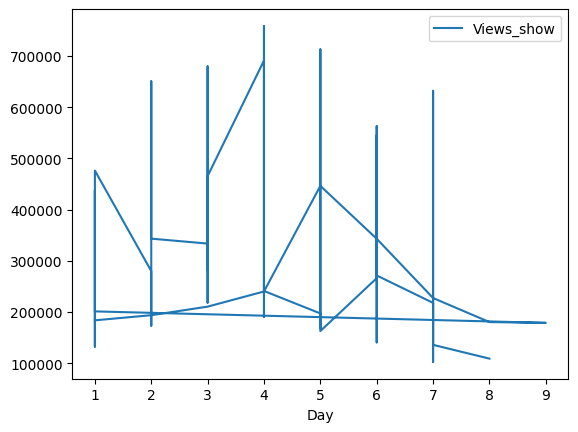

In [341]:
media.plot.line(x='Day',y='Views_show')

In [342]:
media['weekday']  = (media['Day'] + 3 ) % 7
media.replace(0,7,inplace=True)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,7,7,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,7,7,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,7,7,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,7,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,7,7,5,1


# Buliding the Model With Weekdays and Vistors

In [343]:
x = media[['Visitors','weekday']]

y = media['Views_show']

In [344]:
lm = linear_model.LinearRegression()
lm.fit(x,y)

LinearRegression()

In [345]:
import statsmodels.api as sm

x = sm.add_constant(x)

lm_1 = sm.OLS(y,x).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     30.12
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           2.18e-10
Time:                        17:21:48   Log-Likelihood:                -1046.0
No. Observations:                  80   AIC:                             2098.
Df Residuals:                      77   BIC:                             2105.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.051e+05   1.16e+05     -5.205      0.0

In [346]:
def condi(i):
    if i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else: return 0
    return i

media['weekend'] = [condi(i) for i in media['Day']]

In [347]:
media

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,7,7,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,7,7,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,7,7,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,7,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,7,7,5,1,1
...,...,...,...,...,...,...,...,...,...,...
75,2017-05-15,313945,1808684,2226788,1398052759,1,7,7,3,0
76,2017-05-16,185689,1814227,2199844,1311961223,1,7,7,3,0
77,2017-05-17,142260,1755803,2225752,1248266254,1,7,7,3,0
78,2017-05-18,135871,1749654,2302789,1284859759,1,7,7,3,0


# Running the Model 2 vistors and Weekend

In [348]:
x = media[['Visitors','weekend']]
y = media['Views_show']

In [349]:
import statsmodels.api as sm

x = sm.add_constant(x)

lm_2 = sm.OLS(y,x).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     15.49
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           2.23e-06
Time:                        17:21:48   Log-Likelihood:                -1055.5
No. Observations:                  80   AIC:                             2117.
Df Residuals:                      77   BIC:                             2124.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.251e+05   1.14e+05     -2.839      0.0

# Buliding the Model With Visitors,Weekend,Charcter_a

In [350]:
x = media[['Visitors','weekend','Character_A']]
y =media['Views_show']

In [351]:
import statsmodels.api as sm

x = sm.add_constant(x)

lm_3 = sm.OLS(y,x).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     15.96
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           3.86e-08
Time:                        17:21:48   Log-Likelihood:                -1049.5
No. Observations:                  80   AIC:                             2107.
Df Residuals:                      76   BIC:                             2117.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.862e+05   1.14e+05     -1.634      

Buliding The Fourth Model Visitors,Character_A, Lag_views & Weekend

In [352]:
media['Lag_views'] = np.roll(media["Views_show"], 1)
media['Lag_views'].replace(108961,0,inplace=True)

In [353]:
media.head(10)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday,weekend,Lag_views
0,2017-03-01,183738,1260228,1706478,1060860448,7,7,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,7,7,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,7,7,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,7,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,7,7,5,1,1,240061
5,2017-03-06,342997,1330689,1742540,1140228426,7,7,6,2,0,446314
6,2017-03-07,227313,1363579,1821742,1113811802,7,7,7,3,0,342997
7,2017-03-08,180313,1353483,1795456,1083475096,7,7,8,4,0,227313
8,2017-03-09,178800,1345428,1794157,1067636147,7,7,9,5,0,180313
9,2017-03-10,201180,1344540,1834967,1081234843,7,7,1,4,0,178800


In [354]:
x = media[['Visitors','weekend','Character_A','Lag_views']]
y =media['Views_show']

In [355]:
import statsmodels.api as sm

x = sm.add_constant(x)

lm_4 = sm.OLS(y,x).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     15.16
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           3.96e-09
Time:                        17:21:48   Log-Likelihood:                -1045.4
No. Observations:                  80   AIC:                             2101.
Df Residuals:                      75   BIC:                             2113.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.403e+05   1.11e+05     -2.175      

Buliding The 5th Model Visitors,weekend, Lag_views

In [356]:
x = media[['Views_platform','weekend','Character_A',]]
y =media['Views_show']

In [357]:
import statsmodels.api as sm

x = sm.add_constant(x)

lm_5 = sm.OLS(y,x).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     18.22
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           5.26e-09
Time:                        17:21:48   Log-Likelihood:                -1047.4
No. Observations:                  80   AIC:                             2103.
Df Residuals:                      76   BIC:                             2112.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.596e+05   1.33e+05     -2.

 Buliding The 6th Model Visitors,weekend, Character_A & Ad_Impression 

In [358]:
x = media[['weekend','Character_A','Visitors','Ad_impression']]
y = media['Views_show']

In [359]:
import statsmodels.api as sm

x = sm.add_constant(x)

lm_6 = sm.OLS(y,x).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     38.99
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           1.26e-17
Time:                        17:21:48   Log-Likelihood:                -1024.1
No. Observations:                  80   AIC:                             2058.
Df Residuals:                      75   BIC:                             2070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.763e+05   9.62e+04     -5.994

 Buliding The 7th Model weekend, Character_A & Ad_Impression 

In [360]:
x = media[['Character_A','Visitors','Ad_impression']]
y = media['Views_show']

In [361]:
import statsmodels.api as sm

x = sm.add_constant(x)

lm_7 = sm.OLS(y,x).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     49.86
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           6.41e-18
Time:                        17:21:48   Log-Likelihood:                -1025.6
No. Observations:                  80   AIC:                             2059.
Df Residuals:                      76   BIC:                             2069.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.568e+05   9.66e+04     -5.764

 Buliding The 8th Model Visitors, Cricket_match_india & Ad_Impression 

In [364]:
x = media[['Visitors','Ad_impression','Cricket_match_india']]
y = media['Views_show']

In [365]:
import statsmodels.api as sm

x = sm.add_constant(x)

lm_8 = sm.OLS(y,x).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     47.09
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           2.64e-17
Time:                        17:27:39   Log-Likelihood:                -1027.1
No. Observations:                  80   AIC:                             2062.
Df Residuals:                      76   BIC:                             2072.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.605e+05   9